Imoporting important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

Data loading

In [2]:
df = pd.read_csv('/content/winequality.csv')
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


EDA Process :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [5]:
print(df.isnull().sum())

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


Filling the null values with it's respective column's mean value

In [6]:
for col in df.columns:
  if df[col].isnull().sum() > 0:
    df[col] = df[col].fillna(df[col].mean())

df.isnull().sum()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


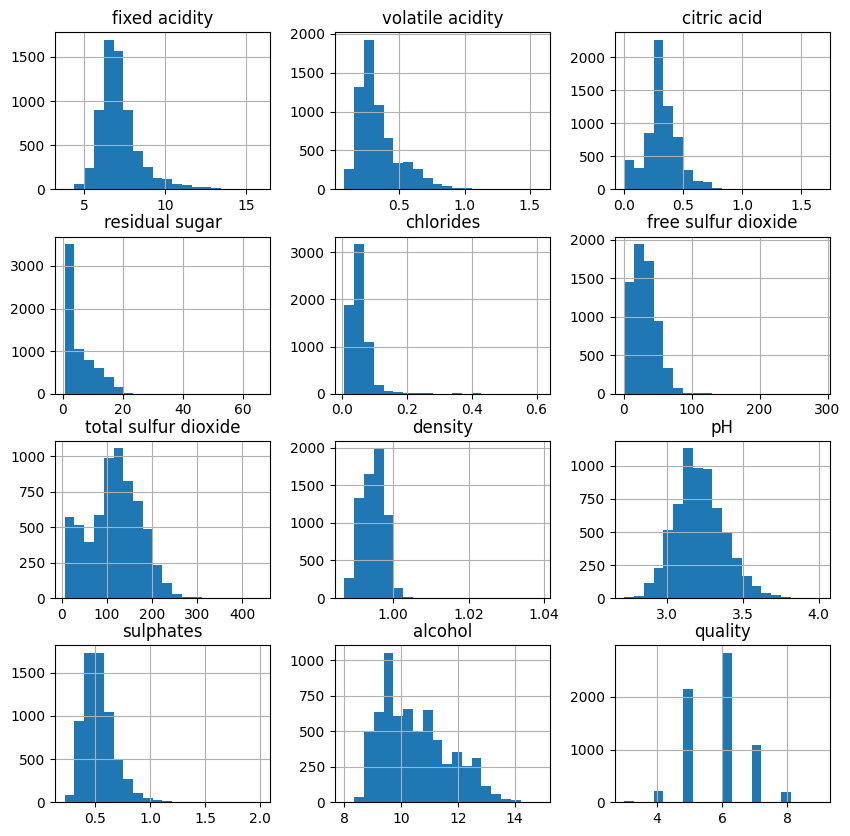

In [7]:
df.hist(bins=20,figsize=(10,10))
plt.show()

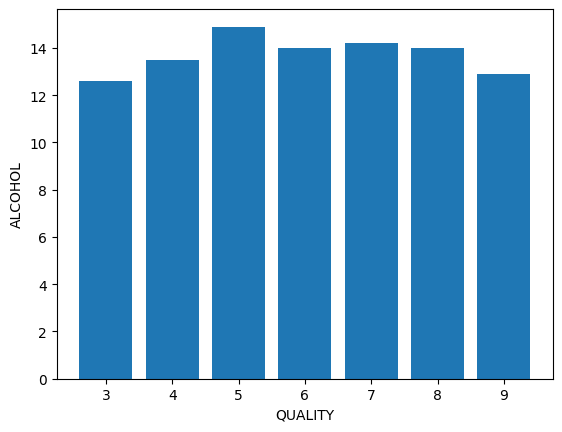

In [8]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel("QUALITY")
plt.ylabel("ALCOHOL")
plt.show()

<Axes: >

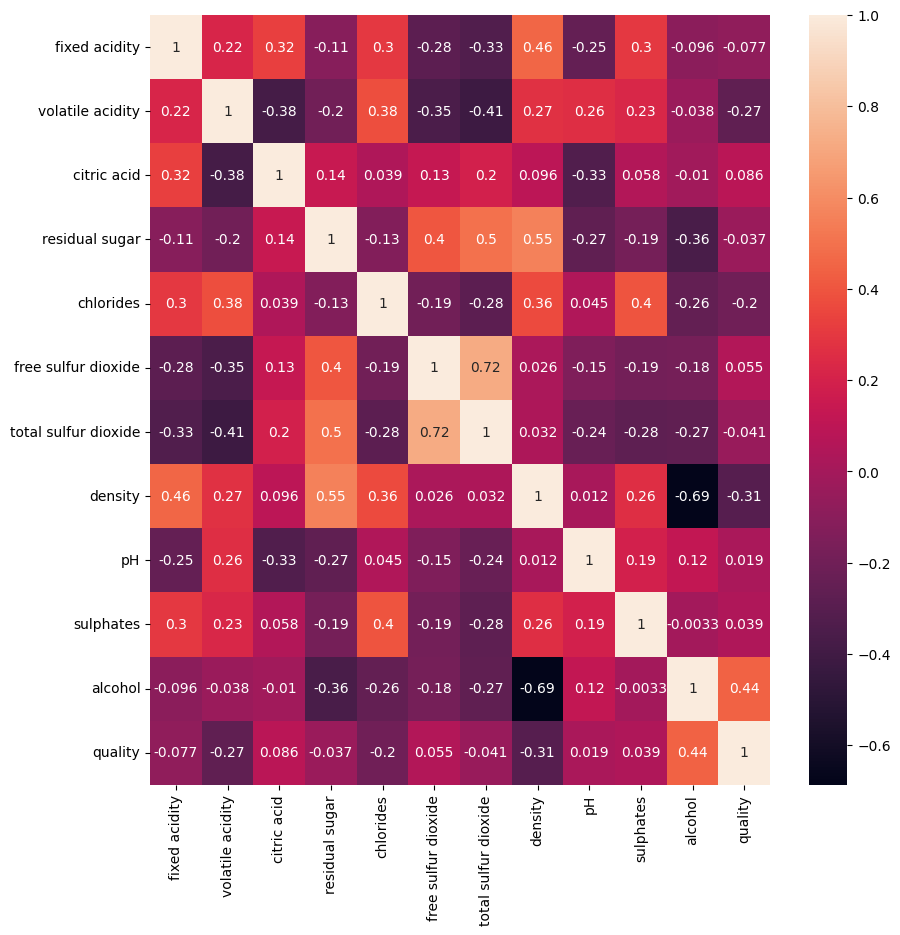

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

We can say that :
* There is a high positive corelation between Toal sulfur dioxide and Free sulfur dioxide
* There is a hgh negative corelation between alcohol and density.
* Other than those 2 there's not much corelation between other columns.

In [10]:
df = df.drop('free sulfur dioxide', axis=1)

Since Free sulfur dioxied and total sulfur dioxide are  highly corelated we are removing one of the column since highly correlated column provides little to no new information.

In [19]:
df['best quality'] = [(1 if x>5 else 0) for x in df.quality]

df.replace({'white':1, 'red':0}, inplace=True)

# EDA 2
Data PreProcessing

In [23]:
x = df.drop(['quality', 'best quality'], axis=1)
y = df['best quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

Splitting the data for trainingand testing.

In [24]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')

x_train = imp.fit_transform(x_train)
x_test = imp.transform(x_test)

x_train.shape, x_test.shape

((5197, 11), (1300, 11))

Normalizing the dataset.

In [25]:
norm = MinMaxScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.transform(x_test)

Model Building

In [26]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(len(models)):
  models[i].fit(x_train, y_train)
  print(f'{models[i].__class__.__name__} : ')    #name of the model
  print('Training Accuracy : ', metrics.roc_auc_score(y_train, models[i].predict(x_train))) #training score
  print('Validation Accuracy : ', metrics.roc_auc_score(y_test, models[i].predict(x_test))) #validation score
  print()

LogisticRegression : 
Training Accuracy :  0.6984157007535635
Validation Accuracy :  0.7028509107998488

XGBClassifier : 
Training Accuracy :  0.978006966998345
Validation Accuracy :  0.7881739050479664

SVC : 
Training Accuracy :  0.7141295154479729
Validation Accuracy :  0.7117750125151969



From above we can say that LR and SVC performs better on validation and training data with less difference.

Now let's draw confusion matrix and classification report for LR model and SVC model.

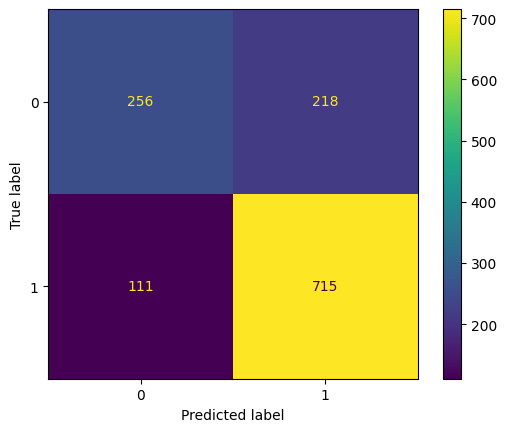

In [35]:
# LR Model Evaluation
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, models[0].predict(x_test))
ConfusionMatrixDisplay(cm).plot()

In [37]:
print(metrics.classification_report(y_test, models[0].predict(x_test)))

              precision    recall  f1-score   support

           0       0.70      0.54      0.61       474
           1       0.77      0.87      0.81       826

    accuracy                           0.75      1300
   macro avg       0.73      0.70      0.71      1300
weighted avg       0.74      0.75      0.74      1300



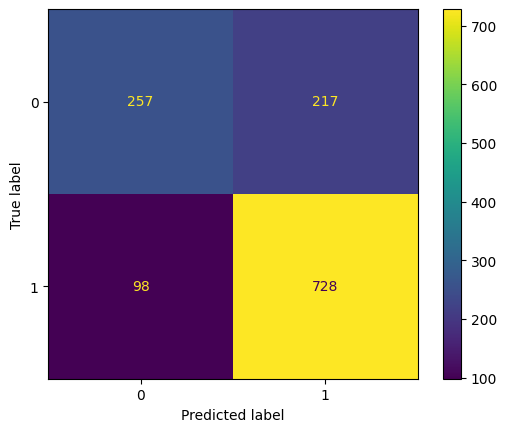

In [38]:
# SVC Model Evaluation
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, models[2].predict(x_test))
ConfusionMatrixDisplay(cm).plot()

In [39]:
print(metrics.classification_report(y_test, models[0].predict(x_test)))

              precision    recall  f1-score   support

           0       0.70      0.54      0.61       474
           1       0.77      0.87      0.81       826

    accuracy                           0.75      1300
   macro avg       0.73      0.70      0.71      1300
weighted avg       0.74      0.75      0.74      1300



Thank you for going through my work till the end, feel free to contact if you have any doubt about my work... :)